In [5]:
import pandas as pd

# Loading the dataset
file_path = "Spells.csv"  # Make sure this path points to your CSV file
df = pd.read_csv(file_path)

# Checking for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Spell ID        0
Incantation     0
Spell Name      0
Effect          0
Light          21
dtype: int64


In [6]:
# Cleaning the column names (remove leading/trailing whitespace)
df.columns = df.columns.str.strip()

In [7]:

# Clean and standardize string values
df['Incantation'] = df['Incantation'].str.strip().str.title()
df['Spell Name'] = df['Spell Name'].str.strip().str.title()
df['Effect'] = df['Effect'].str.strip().str.capitalize()
df['Light'] = df['Light'].str.strip().str.title()


In [8]:
# Filling missing values in the 'Light' column with 'Unknown'
df['Light'] = df['Light'].fillna('Unknown')


In [9]:
# Checking the cleaned data
print("\nData types and non-null counts after cleaning:")
print(df.info())


Data types and non-null counts after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spell ID     61 non-null     int64 
 1   Incantation  61 non-null     object
 2   Spell Name   61 non-null     object
 3   Effect       61 non-null     object
 4   Light        61 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB
None


In [10]:
# Displaying first few rows of the cleaned dataset
print("\nCleaned dataset sample:")
print(df.head())



Cleaned dataset sample:
   Spell ID       Incantation                        Spell Name  \
0         1             Accio                   Summoning Charm   
1         2         Aguamenti                Water-Making Spell   
2         3  Alarte Ascendare  Launch An Object Up Into The Air   
3         4         Alohomora                   Unlocking Charm   
4         5     Arania Exumai            Spider Repelling Spell   

                  Effect     Light  
0      Summons an object   Unknown  
1         Conjures water  Icy Blue  
2  Rockets target upward       Red  
3         Unlocks target      Blue  
4         Repels spiders      Blue  


In [13]:
df['Has Light'] = df['Light'] != 'Unknown'
print("Total spells with visible light:", df['Has Light'].sum())

Total spells with visible light: 40


In [15]:
light_counts = df['Light'].value_counts()
print("Light Color Counts:\n", light_counts)

Light Color Counts:
 Light
Unknown          21
Blue              7
White             7
Red               4
Green             4
Purple            3
Haze              2
Silver            2
Icy Blue          2
Crystal Clear     1
Gold              1
Bright Yellow     1
Scarlet           1
Orange            1
Turquoise         1
Light Green       1
Fiery Orange      1
Black Smoke       1
Name: count, dtype: int64


In [18]:
spells_starting_with_a = df[df['Incantation'].str.startswith('A')]
print("Spells Starting with 'A':\n", spells_starting_with_a[['Incantation', 'Spell Name']])

Spells Starting with 'A':
         Incantation                        Spell Name
0             Accio                   Summoning Charm
1         Aguamenti                Water-Making Spell
2  Alarte Ascendare  Launch An Object Up Into The Air
3         Alohomora                   Unlocking Charm
4     Arania Exumai            Spider Repelling Spell
5  Arresto Momentum                     Slowing Charm
6     Avada Kedavra                     Killing Curse


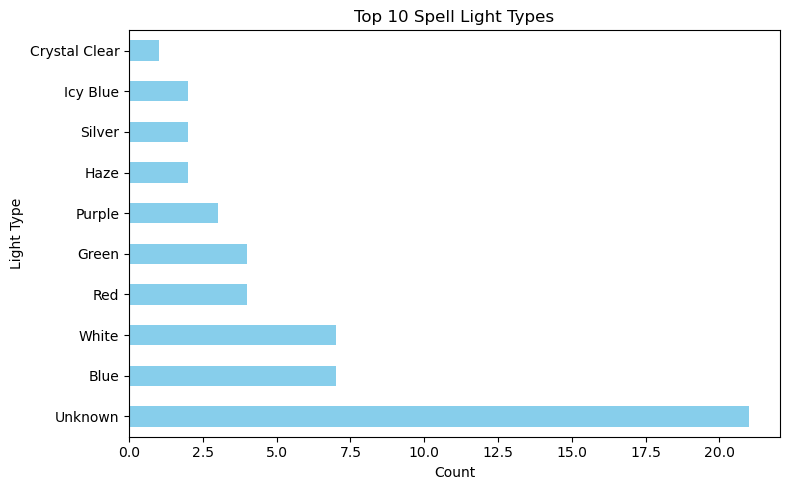

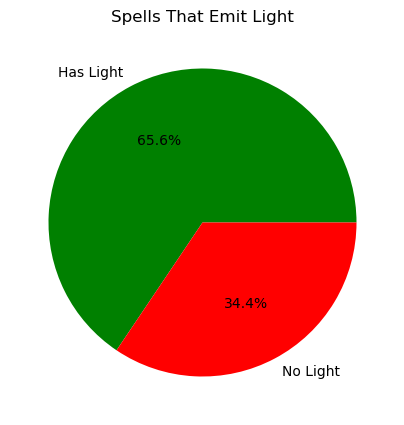

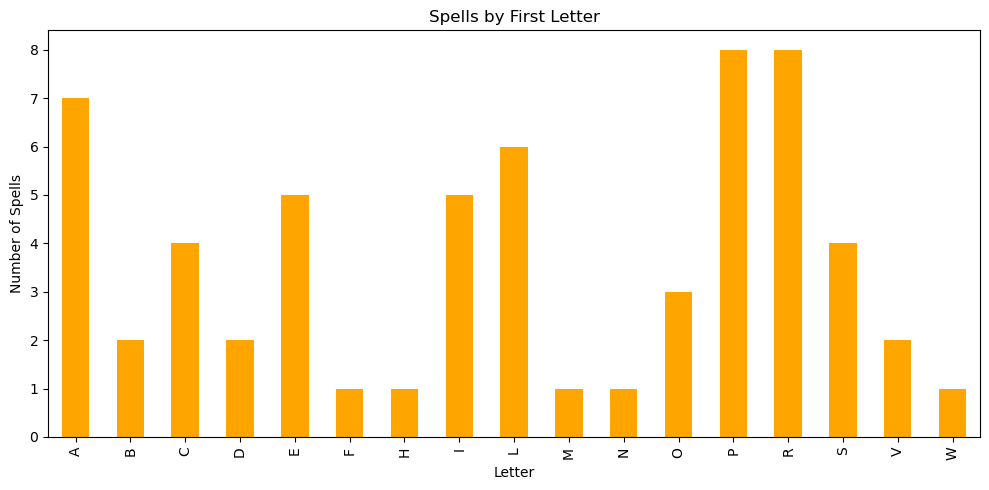

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Spells.csv")

# Clean columns and fill missing values
df.columns = df.columns.str.strip()
df['Light'] = df['Light'].fillna('Unknown').str.strip().str.title()

# Creating a new column: does the spell emit light or not?
df['Has Light'] = df['Light'] != 'Unknown'

# Plot 1: Top 10 light types
top_lights = df['Light'].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_lights.plot(kind='barh', color='skyblue')
plt.title("Top 10 Spell Light Types")
plt.xlabel("Count")
plt.ylabel("Light Type")
plt.tight_layout()
plt.show()

# Plot 2: Pie chart of spells with/without light
has_light = df['Has Light'].value_counts()
labels = ['Has Light', 'No Light']
plt.figure(figsize=(5, 5))
plt.pie(has_light, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Spells That Emit Light")
plt.show()

# Plot 3: Spells by first letter
df['First Letter'] = df['Incantation'].str[0]
letter_counts = df['First Letter'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
letter_counts.plot(kind='bar', color='orange')
plt.title("Spells by First Letter")
plt.xlabel("Letter")
plt.ylabel("Number of Spells")
plt.tight_layout()
plt.show()
